### Digit Recognition

In [15]:
import  numpy as np
import  pandas as pd
from matplotlib import pyplot as plt
import  os
import opendatasets as od

In [16]:
# dataset = 'https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer'
# od.download(dataset)

In [17]:
data = pd.read_csv("mnist-digit-recognizer/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Panda's dataframe is meh.... so change it to numpy arrays for further manipulations**

In [18]:
data = np.array(data)
m, n = data.shape

np.random.shuffle(data)

data_dev = data[0:1000].T       #data used for checking predictions using our trained model
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T         #data used for training our model
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

### Architecture of the model

In [19]:
def init_param():
    W1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

def ReLU(Z):
    return  np.maximum(0, Z)

def SoftMax(Z):
    A = np.exp(Z)/ sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = (W2).dot(A1) + b2
    A2 = SoftMax(Z2)
    return Z1, A1, Z2, A2
    
    
def one_hot(Y): 
    # this function is used to generate a matrix that will be used to compare with our output which will be probabilities
    # this functions adds 1 to the index which is the actual digit and we have to minimize that difference (p - 1)^2
    
    one_hot_Y = np.zeros((Y.shape[0], Y.max()+1))
    one_hot_Y[np.arange(Y.shape[0]), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def ReLU_deriv(Z):
    return Z > 0
    
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)
    
    return dW1, db1, dW2, db2
    
#Applying gradient descent for updating the parameters

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): #alpha is the rate of gradient descent
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


    

##### Now lets work on getting this to give us the **predictions**

In [20]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_param()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1 , W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            
    return W1, b1, W2, b2

In [22]:
W1, b1 , W2, b2 = gradient_descent(X_train, Y_train, 5000, 0.01)

Iteration:  0
[4 2 0 ... 2 2 2] [8 0 7 ... 6 6 4]
0.14224390243902438
Iteration:  10
[4 4 0 ... 2 2 2] [8 0 7 ... 6 6 4]
0.14565853658536584
Iteration:  20
[4 4 0 ... 2 2 2] [8 0 7 ... 6 6 4]
0.1501219512195122
Iteration:  30
[4 4 0 ... 2 2 2] [8 0 7 ... 6 6 4]
0.15490243902439024
Iteration:  40
[4 4 0 ... 2 2 2] [8 0 7 ... 6 6 4]
0.15978048780487805
Iteration:  50
[4 4 0 ... 2 2 2] [8 0 7 ... 6 6 4]
0.16382926829268293
Iteration:  60
[4 4 0 ... 2 1 2] [8 0 7 ... 6 6 4]
0.16897560975609757
Iteration:  70
[4 4 0 ... 2 1 2] [8 0 7 ... 6 6 4]
0.17453658536585365
Iteration:  80
[4 4 0 ... 2 1 8] [8 0 7 ... 6 6 4]
0.1785121951219512
Iteration:  90
[4 0 0 ... 2 1 8] [8 0 7 ... 6 6 4]
0.18317073170731707
Iteration:  100
[4 0 0 ... 2 1 8] [8 0 7 ... 6 6 4]
0.18860975609756098
Iteration:  110
[4 0 0 ... 2 1 8] [8 0 7 ... 6 6 4]
0.19351219512195122
Iteration:  120
[4 0 0 ... 2 1 8] [8 0 7 ... 6 6 4]
0.20053658536585367
Iteration:  130
[4 0 0 ... 2 1 8] [8 0 7 ... 6 6 4]
0.2066341463414634
Iterat

We have ~83% accuracy on the training set

Lets work on Making actual predictions now

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Looking at some example cases:

Prediction:  [5]
Label:  8


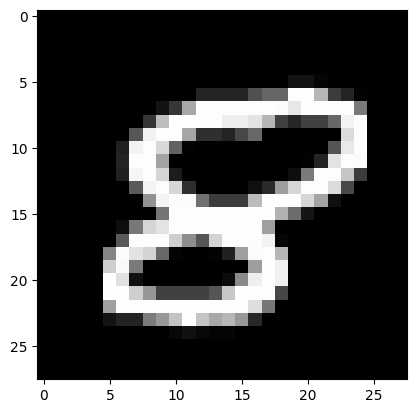

Prediction:  [0]
Label:  0


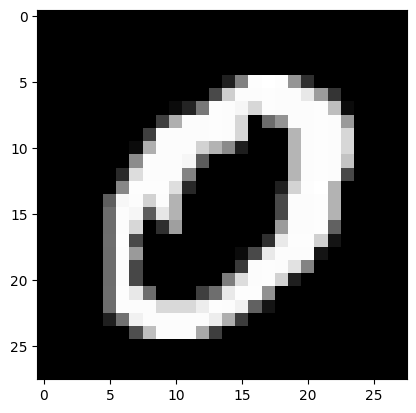

Prediction:  [7]
Label:  7


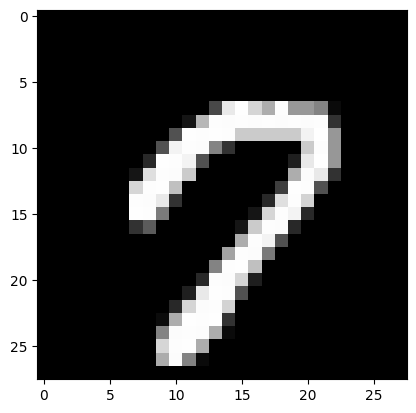

Prediction:  [6]
Label:  6


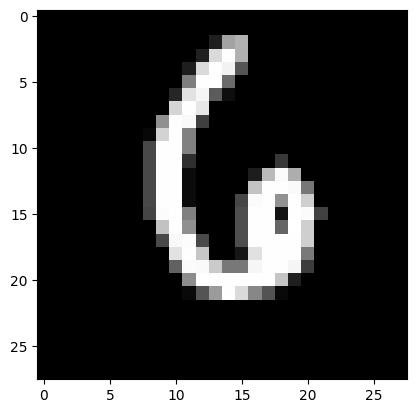

In [24]:

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)



1/4 is wrong so decent network achieved i think